# Ejercicios procesos estocásticos discretos

### Clima como cadena de Markov:
Siendo el estado 1 que llueve y 2 No llueve, la matriz de transición es
$\begin{bmatrix}
0.6 & 0.4\\
0.2 & 0.8 
\end{bmatrix}$
Simular la evolución del sistema durante 100 días partiendo de que ayer fue un día despejado. 

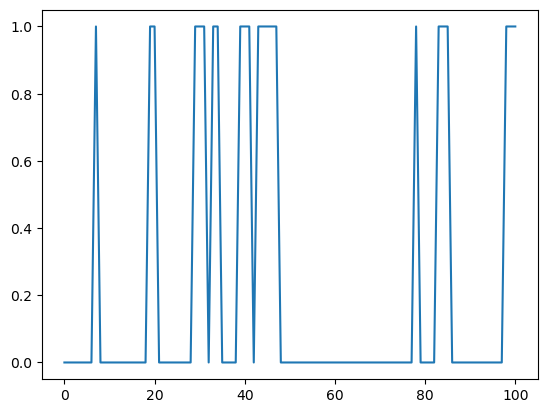

In [19]:
import numpy as np
import matplotlib.pyplot as plt

transit_matrix=np.array([[0.6,0.4],[0.2,0.8]])
probabs=transit_matrix[1,:] #Inicio en estado 2
lista_estados=[0] #0 para no lluvia, 1 para lluvia
for i in range(100):
    u=np.random.uniform()
    if u<=probabs[0]:
        
        lista_estados.append(1)
        probabs=transit_matrix[0,:]
    else: 
        lista_estados.append(0)
        probabs=transit_matrix[1,:]
plt.plot(lista_estados)

    

## Markov 2
Con intentos Bernoulli(p) para heads (H), Calcular 
- 1) Probabilidad de que la cadena termine en HHH.
- 2) Probabilidad de que se alcance la cadena HHH en N intentos.
- 3) Probabilidad de que la primera vez que se alcance la cadena sea al final de los N intentos (HHH en posiciones N-2, N-1, N)

Lo modelo con cadena de markov al formular estados $H_0$, $H_1$, $H_2$, $H_3$. En problema 1, estado $H_3$ puede regresar a $H_0$, en problema 2 y 3, modelo al estado $H_3$ como absorbente.

Para el punto 3 debo observar que con $X=$ índice final de la primera cadena HHH, me preguntan por $P(X=N)$ pero puedo hacer uso de una función de distribución acumulada: $P(X=N)=P(X\leq N)-P(X\leq N-1)$
(El punto dos es $P(X\leq N)$)

In [124]:
import numpy as np

N=20
#########Cálculo teórico de probabilidades
#1) Cadena con H3 no absorbente. Obs: Se estabiliza con N=3
p=1/2
q=1-p
P=np.array([[1-p, p,0, 0],[1-p,0,p,0],[1-p,0,0,p],[1-p,0,0,p]])
PN=np.linalg.matrix_power(P,N)
PN
#2) Cadena con H3 absorbente
P2=np.copy(P)
P2[3,:]=np.array([0,0,0,1])
P2N=np.linalg.matrix_power(P2,N)
P2N
#3)
P2N_1=np.linalg.matrix_power(P2,N-1)


#Método auxiliar
def slice_in_array(subarr, arr):
    len_subarr=len(subarr)
    len_arr=len(arr)
    prueba=any(all(subarr == arr[i:i+len_subarr]) for i in range(len_arr-len_subarr+1))
    return prueba
#Simulación y comparación
#1
numsim=10000
num_exitos_1=0
num_exitos_2=0
num_exitos_3=0
for i in range(numsim):
    coinflip=np.random.choice([0,1],size=N,p=[p,q])
    #1
    if (coinflip[-3:]==[1,1,1]).all():
        num_exitos_1+=1
    #2
    if slice_in_array([1,1,1],coinflip):
        num_exitos_2+=1
    #3
    if ((coinflip[-3:]==[1,1,1]).all()) and (not slice_in_array([1,1,1],coinflip[:-1])):
        num_exitos_3+=1
    
print(f"Probabilidad simulada de cadena HHH al final: {PN[0,3]}. Probabilidad simulada {num_exitos_1/numsim}")
print(f"Probabilidad simulada de cadena HHH en N intentos: {P2N[0,3]}. Probabilidad simulada {num_exitos_2/numsim}")
print(f"Probabilidad simulada de cadena HHH en N intentos: {P2N[0,3]-P2N_1[0,3]}. Probabilidad simulada {num_exitos_3/numsim}")



Probabilidad simulada de cadena HHH al final: 0.125. Probabilidad simulada 0.12596
Probabilidad simulada de cadena HHH en N intentos: 0.7870283126831055. Probabilidad simulada 0.78657
Probabilidad simulada de cadena HHH en N intentos: 0.018609046936035156. Probabilidad simulada 0.0187


### Correlaciones espúreas y random walks
Correlaciones no significativas. Más allá de la causalidad, son correlaciones que en sí mismas solo aparentan dar información.
Ejemplo. Simular tiros de moneda y ver correlación entre series definidas en cada punto como:
- Cantidad de H menos cantidad de T hasta ese momento

[[1.         0.85986669]
 [0.85986669 1.        ]]


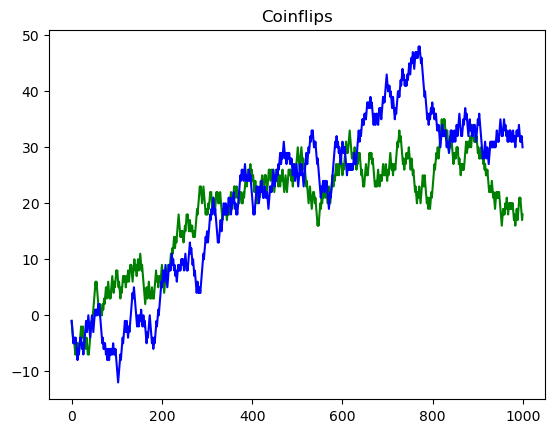

In [23]:
import numpy as np
import matplotlib.pyplot as plt
p=1/2
q=1-p
N=1000
#Simulo los T como -1 en vez de 0 para poder hacer la suma acumulada 
coinflips1=np.random.choice([1,-1],size=N,p=[p,q])
coinflips2=np.random.choice([1,-1],size=N,p=[p,q])
series1=np.cumsum(coinflips1)
series2=np.cumsum(coinflips2)

plt.plot(range(N),series1,'g',label="coin 1")
plt.plot(range(N),series2,'b',label="Coin 2")
plt.title("Coinflips")
print(np.corrcoef([series1,series2]))

In [27]:
mat=[series1,series2]
np.corrcoef(mat)
np.array(mat).shape

(2, 1000)

## Ejercicio Mode V
El tiempo entre las llegadas de las órdenes de producción a una empresa,
se distribuyen $N(3 \text{horas}, \sigma =20 \text{min}=\frac{1}{3} \text{horas})$.

Hay tres tipos diferentes de órdenes: la orden 1 tiene una probabilidad del 50%, la orden 2 del 20%
y la orden 3 del 30%. Estas órdenes son diferentes en cuánto a su
contenido, por lo tanto, el tiempo de procesamiento no es igual para todas
las órdenes. En la siguiente tabla se da la información necesaria para los
tiempos de procesamiento de cada orden.
Distribución tiempos de procesamiento: 

orden tipo 1: $exp(\lambda=\frac{1}{3} \frac{órdenes}{hora})$  
Orden tipo 2: $unif(2.5 h ,4.5 h)$
Orden tipo r: Empírica: 

# Caminata aleatoria